In [1]:
from darts.models import AutoARIMA

The `LightGBM` module could not be imported. To enable LightGBM support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


In [2]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries

%matplotlib inline

In [4]:
file_path = '../../../raw_data/processed/'
station_name = 'wormwood_street__liverpool_street'

In [36]:
df= pd.read_csv(file_path+f'processed_all_{station_name}_2020-01-01_2023-06-19_full_data_4.csv')
df['startdate'] = pd.to_datetime(df['startdate']).dt.tz_localize(None)
df.drop(columns=['year', 'month', 'day','hour', 'weekday'], inplace=True)

In [38]:
series = TimeSeries.from_dataframe(df, time_col='startdate', value_cols=station_name, fill_missing_dates=True, freq='H', fillna_value=0)

In [39]:
train, val = series.split_before(pd.Timestamp('20230615'))

In [40]:
covariates = ['elisabeth_line', 'lockdown','strike', 'school_holidays', 'daytime', 'London_zone_Central',
    'London_zone_North', 'London_zone_West', 'London_zone_South_West',
    'London_zone_South_East', 'London_zone_East', 'Event', 'temperature',
    'rainfall', 'snowfall', 'cloudcover', 'wind_speed', 'wind_direction']

cov_series = TimeSeries.from_dataframe(df, time_col='startdate', value_cols=covariates, fill_missing_dates=True, freq='H', fillna_value=0)


<Axes: xlabel='startdate'>

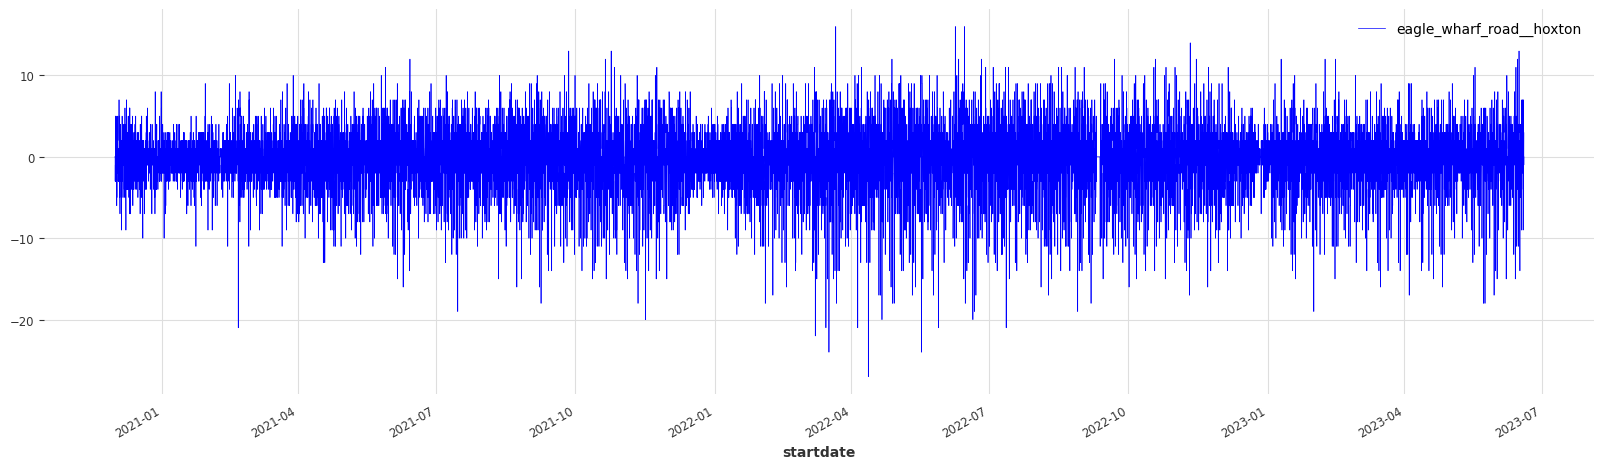

In [41]:
plt.figure(figsize=(20, 5))
series.plot(c='b',linewidth=0.5)

<Axes: xlabel='startdate'>

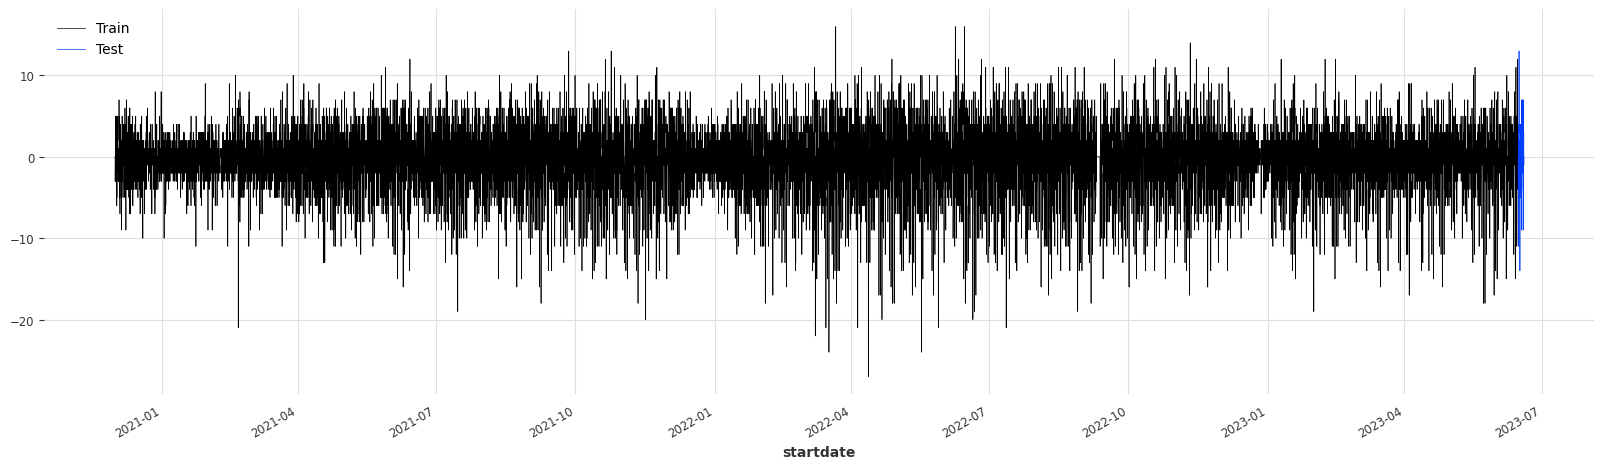

In [42]:
plt.figure(figsize=(20, 5))
train.plot(linewidth=0.5, label='Train')
val.plot(linewidth=0.5, label='Test')

<Axes: xlabel='startdate'>

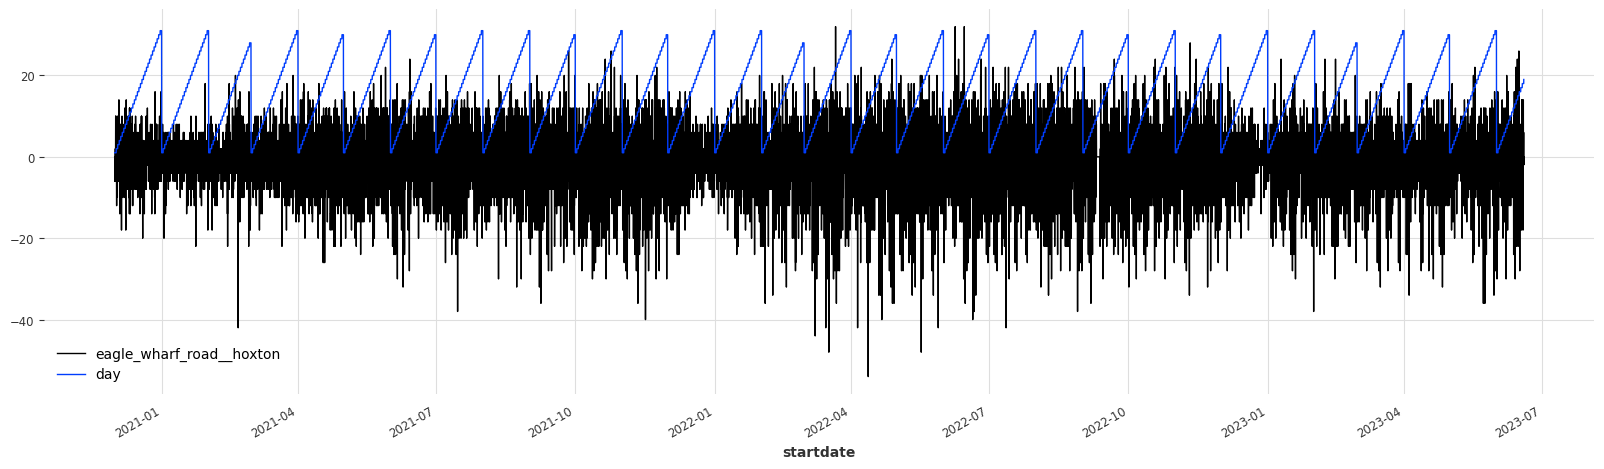

In [43]:
plt.figure(figsize=(20, 5))
(series / 0.5).add_datetime_attribute("day").plot(linewidth=1)

<Axes: xlabel='startdate'>

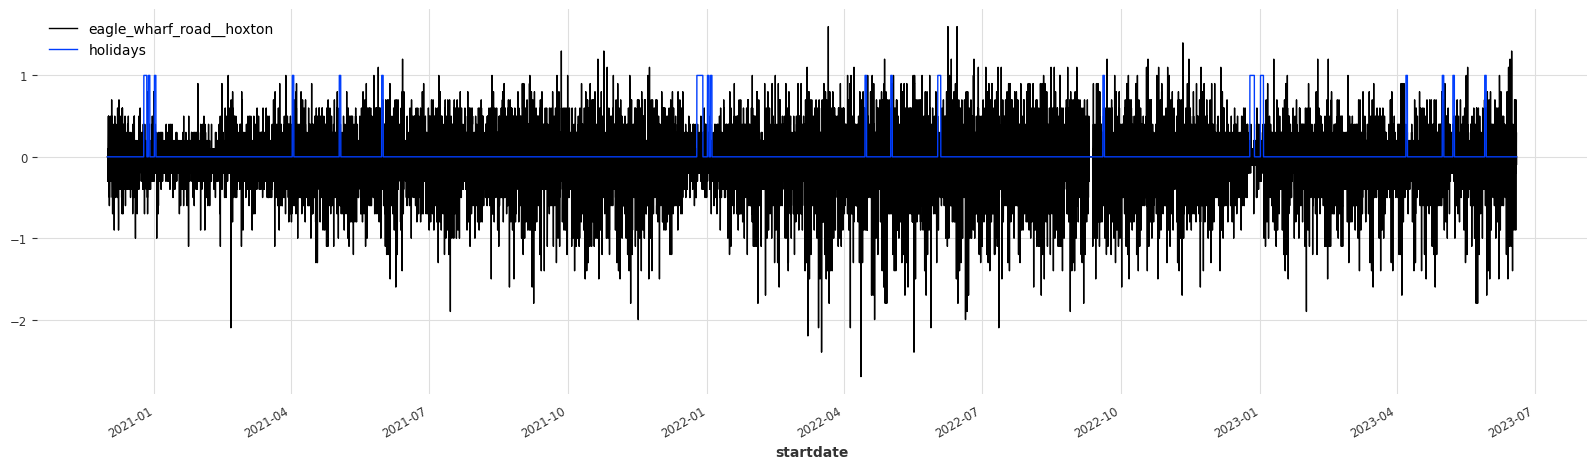

In [44]:
plt.figure(figsize=(20, 5))
(series / 10).add_holidays("UK").plot(linewidth=1)

<Axes: xlabel='startdate'>

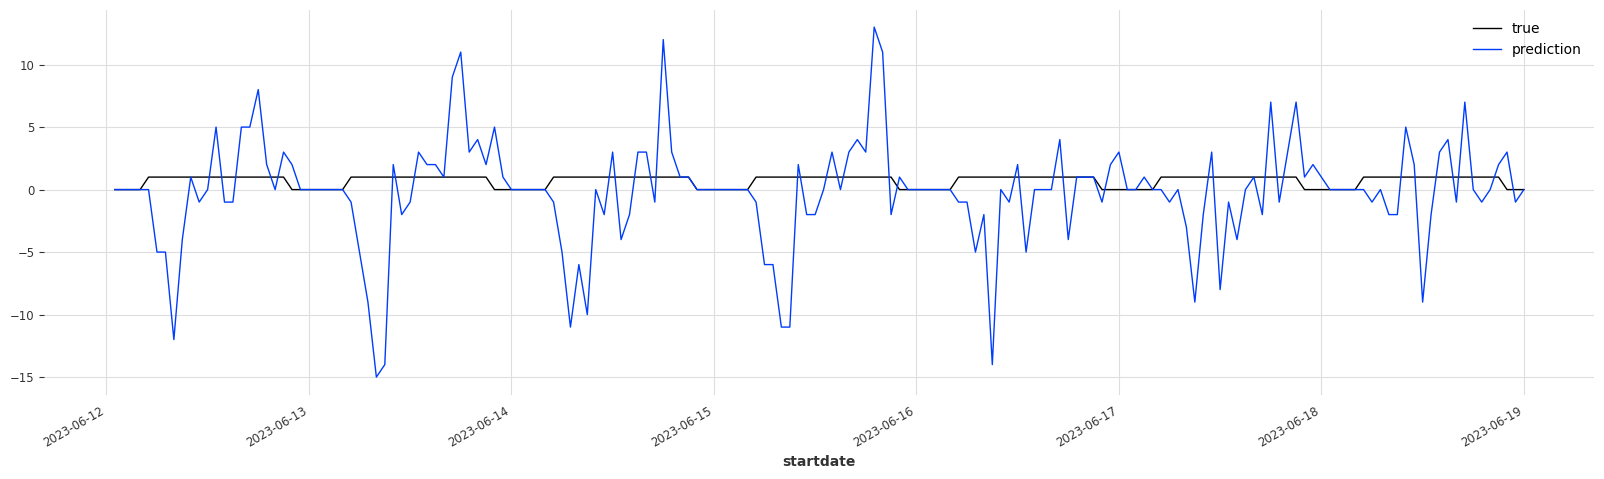

In [47]:
plt.figure(figsize=(20, 5))
cov_series[-168:]['daytime'].plot(linewidth=1, label="true")
series[-168:].plot(linewidth=1, label="prediction")

In [45]:
model_loaded = AutoARIMA.load("eagle_wharf_road__hoxton_model_correct_data_encoded.pkl")

In [48]:
pred = model_loaded.predict(len(val),future_covariates=cov_series)

/home/sebasmar/.pyenv/versions/3.10.6/envs/london-bss/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['uses_future_covariates', 'uses_past_covariates']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='startdate'>

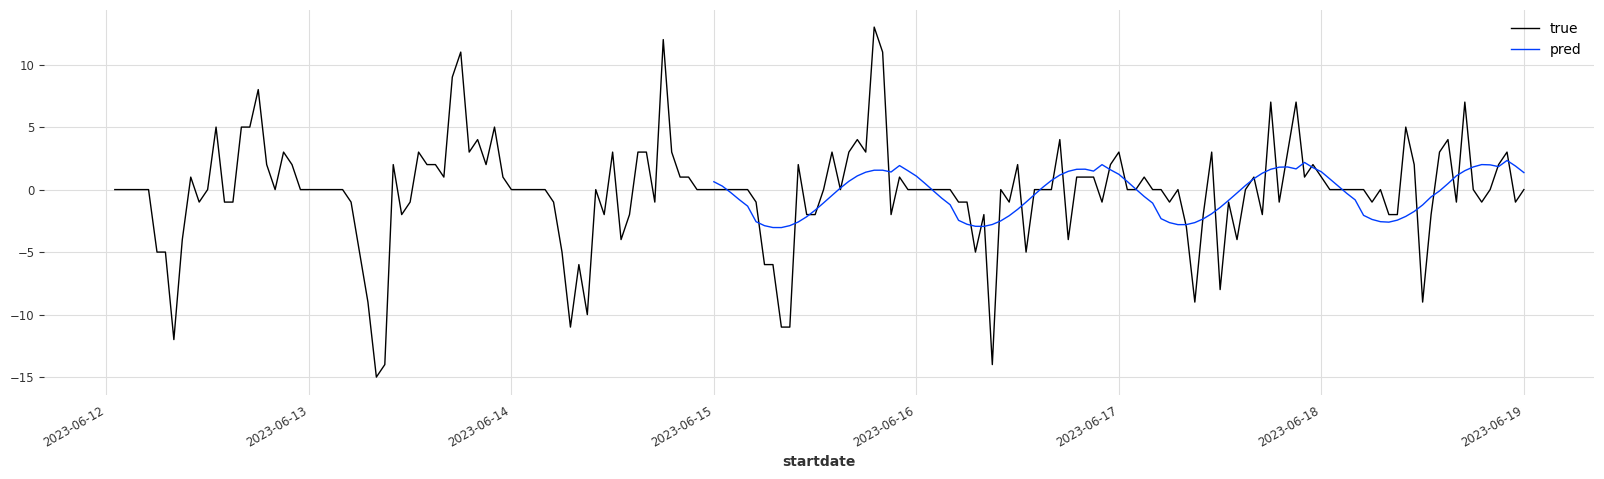

In [51]:
plt.figure(figsize=(20, 5))
series[-168:].plot(linewidth=1, label="true")
pred[-168:].plot(linewidth=1, label="pred")